<h1 dir=rtl align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه‌ای بر شبکه عصبی
</font>
</h1>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
     در این تمرین قصد داریم ساختار پرسپترون و الگوریتم آموزش آن را پیاده‌سازی کنیم. کدنویسی در این سطح به شما کمک خواهد کرد که به شکل عملی درک عمیق‌تری از نحوه‌ی کار این مدل پیدا کنید و در آینده نیز هنگام مواجه با مدل‌های مختلف شبکه‌های عصبی قادر به تحلیل آسان‌تر ساختار آن‌ها باشید.
</font>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<span style="color:orange"><b>نکته:</b></span>
در این تمرین شما تنها مجاز هستید از کتاب خانه‌هایی که در فایل <code>import</code>  شده‌اند، استفاده کنید.  
</font>
</p>

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
ابتدا با استفاده از تابع زیر یک مجموعه‌داده‌ی مصنوعی دو بعدی را تولید می‌کنیم . این مجموعه، یک مجموعه‌داده‌ی دو کلاسه است.
</font>

In [25]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features + 1)
        self.errors = []

        for _ in range(self.n_iterations):
            error = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0)
            self.errors.append(error)
        
    def predict(self, X):
        activation = np.dot(X, self.weights[1:]) + self.weights[0]
        return 1 if activation >= 0 else 0

In [26]:
def load_datasets():
    X1, y1 = sklearn.datasets.make_gaussian_quantiles(
      cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1)
    X2, y2 = sklearn.datasets.make_gaussian_quantiles(
      mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1)

    X = np.concatenate((X1, X2))
    y = np.concatenate((y1, -y2 + 1))

    return X , y


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
خروجی تابع <code>load_datasets</code> شامل <code>X</code>, <code>y</code> است که
<code>X</code> آرایه‌ی نامپای با اندازه‌ی ۲ ستون در ۵۰۰ سطر است
و <code>y</code> یک بردار ۵۰۰ تایی ۰ و ۱ است، که نمایانگر برچسب هر کدام از نقاط موجود در <code>X</code> است.
</font>

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مصورسازی مجموعه‌داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
مجموعه‌داده را با استفاده از کتابخانه‌ی <code>matplotlib</code> رسم کنید. نقاط با برچسب ۱ را با رنگ آبی و نقاط با برچسب ۰ را با رنگ قرمز مشخص نمایید.
</font>


In [27]:
X, y = load_datasets()

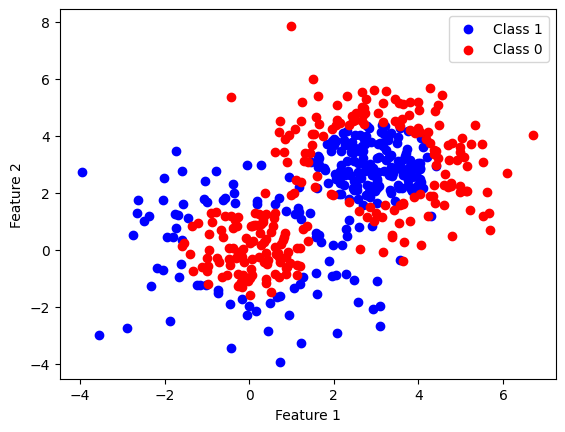

In [28]:
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مدل پایه
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
قبل از ساختن یک شبکه عصبی، ابتدا ببینیم که الگوریتم <code>LogisticRegressionCV</code> چگونه این نقاط را دسته بندی می‌کند. همان‌طور که می‌دانیم این مدل، یک مدل خطی است.
</font>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
برای این کار از کتابخانه‌ی <code>scikit-learn</code> کمک بگیرید.
</font>

In [29]:
import sklearn.linear_model


logistic_model = sklearn.linear_model.LogisticRegressionCV(cv=5)
logistic_model.fit(X, y)

LogisticRegressionCV(cv=5)

Text(0, 0.5, 'Feature 2')

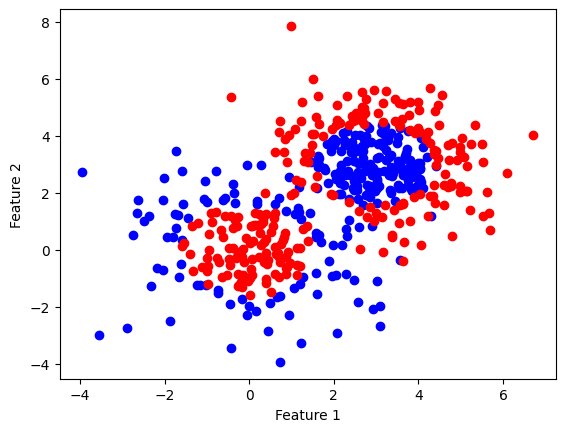

In [30]:
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [31]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


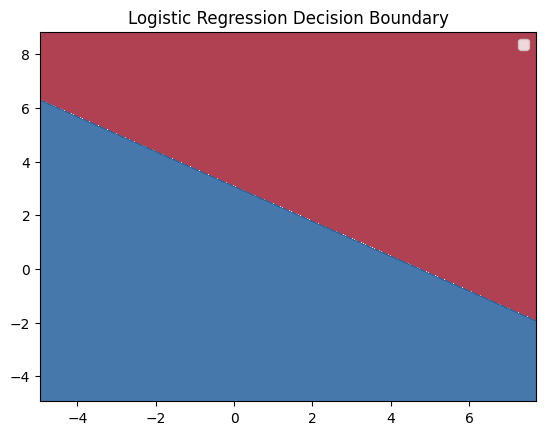

In [32]:
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
plt.legend(loc='best')
plt.title('Logistic Regression Decision Boundary')
plt.show()

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
تابع <code>plot_decision_boundary</code> زیر به شما کمک می‌کند تا محدوده‌ی دسته‌بندی مدل را ترسیم کنید.
</font>


OR :

In [33]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.inspection import DecisionBoundaryDisplay

clf = LogisticRegressionCV(cv=5)
clf.fit(X, y)

LogisticRegressionCV(cv=5)

In [34]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(10, 5))

    ax = plt.subplot(121)
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        cmap=plt.cm.Paired,
        response_method="predict",
        ax=ax,
        xlabel="x",
        ylabel="y")
    
    x_min, x_max = disp.xx0.min(), disp.xx0.max()
    y_min, y_max = disp.xx1.min(), disp.xx1.max()

    plt.axis("tight")

    for i, n, c in zip(range(2), "AB", "br"):
      idx = np.where(y == i)
      plt.scatter(
          X[idx, 0],
          X[idx, 1],
          c=c,
          cmap=plt.cm.Paired,
          s=20,
          edgecolor="k",
          label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc="upper right")
    plt.title("Decision Boundary")

C:\Users\Acer\AppData\Local\Temp\ipykernel_24392\2020083047.py:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


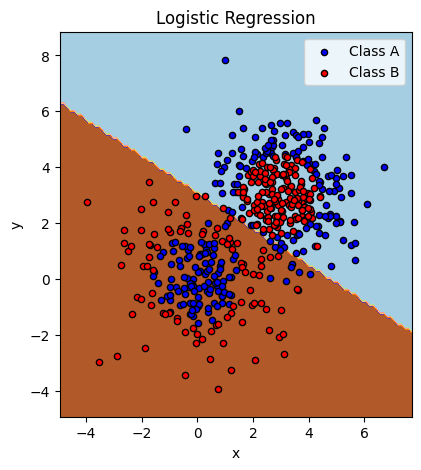

In [35]:
plot_decision_boundary(clf, X, y)
plt.title("Logistic Regression");

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
شبکه‌ی عصبی ساده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
همان‌طور که در قسمت قبل قابل مشاهده است این مجموعه نقاط به‌صورتی نیستند که بتوانیم با یک مدل خطی آن‌ها را از یکدیگر تفکیک کنیم، در نتیجه Logistic Regression عملکرد خوبی ندارد. پس در ادامه یک شبکه عصبی ساده می‌نویسیم و داده‌ها را با آن دسته‌بندی می‌کنیم.
</font>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
تصویری از مدلی که باید پیاده سازی کنیم را در زیر می‌بینیم.
</font>
</p>

<center>
<img src="model_1.jpg">
</center>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
واضح است که ورودی مدل یک دوتایی است (زیرا ورودی آن مختصات یک نقطه در فضای دو بعدی است).برای شبکه عصبی دو لایه در نظر می‌گیریم که لایه‌ی اول شامل ۴ نورون و لایه‌ی دوم ۱ نورون دارد.
تابع فعال‌ساز لایه‌ی اول <code>tanh</code>   و تابع فعال‌ساز لایه‌ی دوم <code>sigmoid</code> است.
خروجی مدل نیز یک عدد است (مقدار ۰ یا ۱).
</font>

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تنظیم مشخصات کلی شبکه
</font>
</h3>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
پس در ابتدا متغیرهایی تعریف کنید و تعداد ورودی، تعداد خروجی و تعداد نورون‌های لایه‌ی اول را مشخص نمایید.
</font>
</p>

In [36]:
n_x = 2
n_h = 4
n_y = 1


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقداردهی اولیه پارامترها (وزن‌ها)
</font>
</h3>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
اکنون تابع زیر را تکمیل کنید. این تابع متغیرهای تنظیم‌شده در سلول بالا را دریافت می‌کند و مقادیر اولیه  <code>W1</code>، <code>b1</code>، <code>W2</code> و <code>b2</code> را بر می‌گرداند. وزن‌ها را به‌صورت تصادفی و با استفاده از تابع توزیع گوسی مقداردهی کنید (واریانس این توزیع <code>0.01</code> باشد)  و مقدار اولیه <code>b</code> را <code>0</code> قرار دهید.
</font>
</p>
<details dir="rtl" style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<summary dir="rtl" style="color:orange"><b>راهنمایی: ابعاد خروجی تابع</b></summary>
متغیر های خروجی باید ابعادی به شکل زیر داشته باشند:
<p  style="direction: rtl; text-align: center; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
<code>
W1.shape = (4, 2)
</code>
<br>
<code>
b1.shape = (4, 1)
</code>
<br>
<code>
W2.shape = (1, 4)
</code>
<br>
<code>
b2.shape = (1, 1)
</code>
</font>
</details>

In [37]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(0)
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return parameters

In [38]:
parameters = initialize_parameters(n_x, n_h, n_y)

for key, value in parameters.items():
    print(key, value.shape)
    print(value)
    print('-' * 60)

W1 (4, 2)
[[ 0.01764052  0.00400157]
 [ 0.00978738  0.02240893]
 [ 0.01867558 -0.00977278]
 [ 0.00950088 -0.00151357]]
------------------------------------------------------------
b1 (4, 1)
[[0.]
 [0.]
 [0.]
 [0.]]
------------------------------------------------------------
W2 (1, 4)
[[-0.00103219  0.00410599  0.00144044  0.01454274]]
------------------------------------------------------------
b2 (1, 1)
[[0.]]
------------------------------------------------------------


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
انتشار رو به جلو (Forward Propagation)
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
اکنون نیاز است گذر رو به جلو را در تابع <code>forward_propagation</code> پیاده‌سازی کنید. برای راحتی شما دوباره فرمول‌ها را در زیر آورده‌ایم. اما می‌توانید از تصویر مدل نیز استفاده کنید. همچنین برای این‌که کد تمیزتری داشته باشید، بهتر است تابع سیگموید را در یک تابع جدا پیاده‌سازی کنید.
</font>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
فراموش نکنید که تابع علاوه بر مقدار <code>A2</code> باید بقیه مقادیر را نیز برگرداند. (به این مقادیر در فاز <code>backward_propagation</code> نیازمندیم)
</font>
</p>


$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}$$
$$a^{[1] (i)} = \tanh(z^{[1] (i)})$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})$$
$$ \sigma (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-x} }  $$

In [39]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [40]:
# make sure that the function works correctly: should output array([[0.5]])
sigmoid(np.array([[0.]]))

array([[0.5]])

In [41]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    X = X.T 

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }

    return A2, cache

A2, cache = forward_propagation(X, parameters)

In [42]:
A2, cache = forward_propagation(X, parameters)

for key, value in cache.items():
    print(key, value.shape)

Z1 (4, 500)
A1 (4, 500)
Z2 (1, 500)
A2 (1, 500)


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تابع هزینه (Cost Function)
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
حال نیاز است تابع هزینه را پیاده‌سازی کنید. تابع هزینه‌ی مورد نظر،  تابع cross entropy است که به شکل زیر فرموله می‌شود.
</font>
</p>

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right)$$

In [43]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[0]

    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - (1 / m) * np.sum(logprobs)

    cost = float(np.squeeze(cost))

    return cost

In [44]:
Y = y
cost = compute_cost(A2, Y, parameters)
print("Cost = " + str(cost))

Cost = 0.6931494692443646


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
انتشار رو به عقب یا پس‌انتشار (‌Backpropagation)
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
اکنون باید عملیات پس‌انتشار را با توجه به گرادیان‌های محاسبه‌شده در تابع <code>backward_propagation</code> پیاده سازی کنید.
</font>
</p>

$$dz^{[2]} =  a^{[2]} - y$$
$$dW^{[2]} = dz^{[2]}a^{[1]^{T}}$$
$$db^{[2]} = dz^{[2]}$$
$$dz^{[1]} = W^{[2]^{T}}dz^{[2]}* g^{[1]'}(z^{[1]})$$
$$dW^{[1]} = dz^{[1]}X$$
$$db^{[1]} = dz^{[1]}$$

In [45]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[0]

    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]

    dz2 = A2 - Y
    dW2 = (1 / m) * np.dot(dz2, A1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)

    dz1 = np.dot(W2.T, dz2) * (1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dz1, X)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads


In [46]:
grads = backward_propagation(parameters, cache, X, Y)

for key, value in grads.items():
    print(key, value.shape)
    print(value)
    print('-' * 60)

dW1 (4, 2)
[[-8.28959146e-06 -1.34659113e-05]
 [ 3.09989522e-05  4.51775032e-05]
 [ 1.22809200e-05  1.94219225e-05]
 [ 1.31433305e-04  1.99205855e-04]]
------------------------------------------------------------
db1 (4, 1)
[[-2.45522766e-08]
 [-4.56706543e-07]
 [ 1.33812026e-07]
 [ 1.45531655e-06]]
------------------------------------------------------------
dW2 (1, 4)
[[2.10778759e-04 3.73389549e-04 3.50648717e-05 6.67023434e-05]]
------------------------------------------------------------
db2 (1, 1)
[[0.00011204]]
------------------------------------------------------------


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
به‌روزرسانی پارامترها (وزن‌ها)
</font>
</h3>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
پس از محاسبه‌ی گرادیان‌ها می‌توانیم پارامترهای شبکه را آپدیت کنیم. برای این کار طبق فرمول‌های زیر تابع <code>update_parameters</code> را پیاده‌سازی کنید.
</font>
</p>

$$W^{[1]} = W^{[1]} - learningRate * dW^{[1]}$$
$$b^{[1]} = b^{[1]} - learningRate * db^{[1]}$$
$$W^{[2]} = W^{[2]} - learningRate * dW^{[2]}$$
$$b^{[2]} = b^{[2]} - learningRate * db^{[2]}$$


In [47]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [48]:
parameters = update_parameters(parameters, grads, 1.2)

for key, value in parameters.items():
    print(key, value.shape)
    print(value)
    print('-' * 60)

W1 (4, 2)
[[ 0.01765047  0.00401773]
 [ 0.00975018  0.02235472]
 [ 0.01866084 -0.00979609]
 [ 0.00934316 -0.00175262]]
------------------------------------------------------------
b1 (4, 1)
[[ 2.94627320e-08]
 [ 5.48047852e-07]
 [-1.60574431e-07]
 [-1.74637986e-06]]
------------------------------------------------------------
W2 (1, 4)
[[-0.00128512  0.00365792  0.00139836  0.01446269]]
------------------------------------------------------------
b2 (1, 1)
[[-0.00013445]]
------------------------------------------------------------


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
شبکه‌ی عصبی نهایی و حلقه‌ی آموزش
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
حال که تمام اجزای مورد نیاز شبکه‌ی عصبی خود را پیاده کردید می‌توانید آن‌ها در یک تابع کلی کنار هم قرار داده و حلقه‌ی آموزش را بسازید. مدل شبکه عصبی خود را با استفاده از توابع قسمت‌های قبل در تابع <code>nn_model</code> پیاده‌سازی کنید.
</font>
</p>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
روند این تابع باید به‌صورت زیر باشد:
<ul dir=rtl >
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
تابع مقداردهی اولیه فراخوانی شود تا <code>W1</code>، <code>b1</code>، <code>W2</code> و <code>b2</code>  مقداردهی اولیه شوند.
</li>
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
در یک حلقه به تعداد <code>num_iterations</code> بار، مراحل زیر تکرار شود:
</li>
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
انتشار رو به جلو به کمک تابع <code>forward_propagation</code> انجام شود.
</li>
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
مقدار تابع هزینه محاسبه شود.
</li>
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
مقدار گرادیان به کمک پس‌انتشار یعنی تابع <code>backward_propagation</code> محاسبه شود.
</li>
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
پارامترها به کمک تابع <code>update_parameters</code> به‌روزرسانی شوند.
</li>
</ul>
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
پیشنهاد می‌شود بعد از یک تعداد دور (مثلاُ ۱۰۰۰ دور) میزان هزینه را خروجی دهید.
</font>
</p>

In [49]:
def nn_model(X, Y, learning_rate, num_iterations=10000):
    n_x, n_h, n_y = X.shape[1], 4, 1 

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")

    return parameters


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش‌بینی
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در انتها باید تابع <code>predict</code> را پیاده‌سازی کنیم. این تابع خروجی شبکه را به‌صورت زیر پیش‌بینی کند:
</font>
</p>

$$ y^{(i)}_{prediction} = \begin{cases} 1 & \text{if } a^{[2](i)} > 0.5 \\ 0 & \text{otherwise } \end{cases} $$

In [50]:
def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)

    return predictions

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
آزمایش
</font>
</h3>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
اکنون با کد زیر مدل را <code>150000</code> بار با نرخ یادگیری <code>0.1</code> آموزش دهید.
</font>

In [51]:
parameters = nn_model(X, y, learning_rate = 0.1 , num_iterations = 150000)

Cost after iteration 0: 0.6931494692443646
Cost after iteration 1000: 0.6931175288592846
Cost after iteration 2000: 0.6930913618486959
Cost after iteration 3000: 0.6930823895817256
Cost after iteration 4000: 0.6930771572630118


Cost after iteration 5000: 0.6930736284521738
Cost after iteration 6000: 0.6930710463623108
Cost after iteration 7000: 0.6930690519435827
Cost after iteration 8000: 0.6930674503664592
Cost after iteration 9000: 0.6930661259848607
Cost after iteration 10000: 0.6930650054466821
Cost after iteration 11000: 0.6930640397586222
Cost after iteration 12000: 0.6930631948272425
Cost after iteration 13000: 0.6930624461245164
Cost after iteration 14000: 0.6930617755091831
Cost after iteration 15000: 0.6930611692454711
Cost after iteration 16000: 0.6930606167212118
Cost after iteration 17000: 0.6930601095919249
Cost after iteration 18000: 0.693059641193635
Cost after iteration 19000: 0.6930592061304218
Cost after iteration 20000: 0.6930587999785999
Cost after iteration 21000: 0.6930584190705654
Cost after iteration 22000: 0.6930580603341878
Cost after iteration 23000: 0.6930577211716379
Cost after iteration 24000: 0.6930573993666741
Cost after iteration 25000: 0.6930570930127635
Cost after iteratio

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
حال دوباره محدوده دسته‌بندی مدل شبکه عصبی را رسم کنید و تفاوت‌ها و دقت یادگیری مدل شبکه عصبی را ببینید.
</font>

In [52]:
def plot_decision_boundary_for_nn(model, X, y):

    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Decision Boundary for NN ')

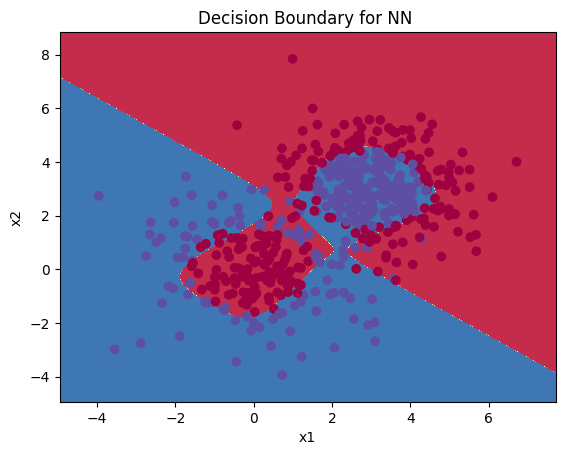

In [53]:
plot_decision_boundary_for_nn(lambda x: predict(parameters, x), X.T, y.T)
plt.title("Decision Boundary for NN ")